In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import zipfile
import pandas as pd

# Extract and read CSV from ZIP
with zipfile.ZipFile("twitter.zip", 'r') as zip_ref:
    zip_ref.extractall("data")  # Extracts to a folder named 'data'

# Now load the CSV
df = pd.read_csv("data/Tweets.csv")  # Replace with correct file name inside the zip
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'data/Tweets.csv'

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'#\w+', '', text)     # remove hashtags
    text = re.sub(r'\W', ' ', text)      # remove special characters
    text = text.lower()                  # convert to lowercase
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
    return ' '.join(text)

df['cleaned_tweet'] = df['text'].apply(clean_text)  # 'text' column may vary in your CSV



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
print(df.columns)


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'cleaned_tweet'],
      dtype='object')


In [ ]:
# Select required columns
df = df[['text', 'airline_sentiment']]

# Rename for simplicity
df = df.rename(columns={'airline_sentiment': 'sentiment'})

# Map sentiment labels to numerical values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Check the first few rows
print(df.head())


                                                text  sentiment
0                @VirginAmerica What @dhepburn said.          0
1  @VirginAmerica plus you've added commercials t...          1
2  @VirginAmerica I didn't today... Must mean I n...          0
3  @VirginAmerica it's really aggressive to blast...         -1
4  @VirginAmerica and it's a really big bad thing...         -1


In [ ]:
X = df['text']  # instead of 'cleaned_tweet'
y = df['sentiment']

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          -1       0.84      0.94      0.88      1889
           0       0.67      0.53      0.59       580
           1       0.81      0.62      0.70       459

    accuracy                           0.81      2928
   macro avg       0.77      0.69      0.72      2928
weighted avg       0.80      0.81      0.80      2928

Confusion Matrix:
 [[1769   91   29]
 [ 233  308   39]
 [ 116   60  283]]


In [ ]:
def predict_sentiment(tweet):
    cleaned = clean_text(tweet)
    vectorized = tfidf.transform([cleaned])
    prediction = model.predict(vectorized)
    return 'Positive' if prediction == 1 else 'Negative' if prediction == -1 else 'Neutral'

# Example:
print(predict_sentiment("I love this phone!"))
print(predict_sentiment("This is the worst product ever."))

Positive
Negative


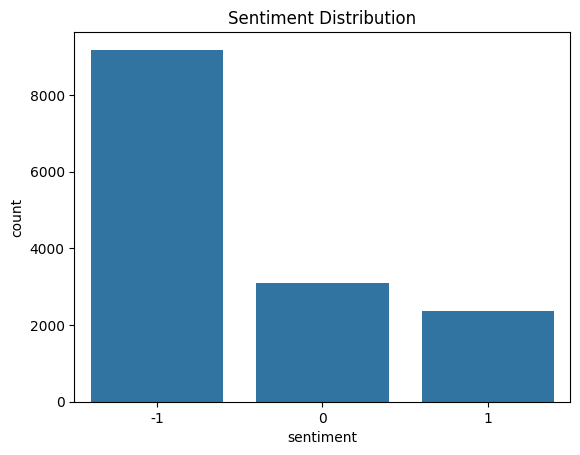

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()
